Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject as ip

# Question 1

The function is optimized using a scalar optimizer. The budget constraint is used to substitute $c$ as an expression of $h$.

The given parameters are listed here. They are however default to the functions in inaugrualproject.py.
When we need to change them, we will do so by passing new parameters to the functions.

In [2]:
m = 0.5
phi = 0.3
eps = 0.5
r = 0.03
tg = 0.012
tp = 0.004
pc = 3

We use the function $\textbf{u_max}$ to maximize the utility function and return the optimum amounts of consumption and housing as well as the utility derived from those values.

$\textbf{print_solution}$ prints out the optimum values and the cost of owning that house (depending on interest and taxation).

In [3]:
# a. print the call from u_max with the default parameters stated above
ip.print_solution(*ip.u_max()) # u_max returns a tuple, using * to unpack it

Optimal house value:
h = 4.1667

Optimal consumption:
c = 0.3500

To be spent on housing:
tau = 0.1500

Maximum utility:
u = 0.7358


Trying to make sense of these numbers, would imply that the rational agent should buy a house with a value of approximately 4.17M DKK. The agent should spend 350K DKK on consumption and 150K DKK on housing interest and taxation. This means that the entire budget of 500K DKK is spent.

# Question 2

We start by creating $N$ evenly spaced values between $0.4$ and $1.5$. Here we try to iterate a 1000 times.

We iterate over the $1000$ different budgets ($m$) and run the optimizer ($u_max$) function each time. Each corresponding amount of consumption and housing are stored in two different arrays.

The $\textbf{ch_figures}$ function will plot graphs of optimal consumption and housing as functions of the budget.

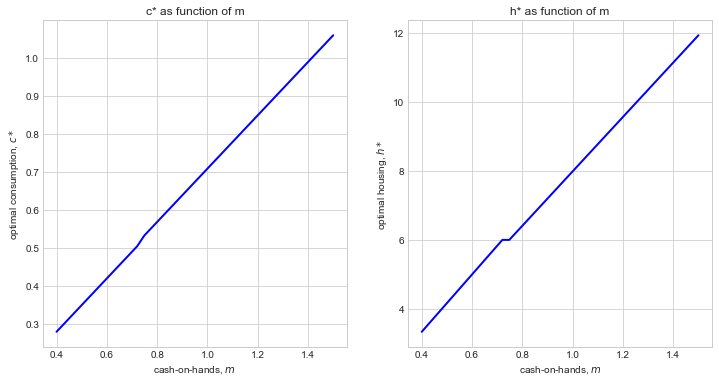

In [11]:
# a. creating array of budgets
N = 1000
m_vals = np.linspace(0.4,1.5,N)

# b. creating arrays of optimal consumption and housing
c_vals = np.empty(N)
h_vals = np.empty(N)

for i,mi in enumerate(m_vals):
    utils = ip.u_max(m=mi)
    
    c_vals[i] = utils[0]
    h_vals[i] = utils[1]

# c. plotting the c* and h* as functions of budget
fig1 = ip.ch_figures(c_vals,h_vals,m_vals)
fig1.savefig('q2_plot1.pdf')

Looking at the curves we can just barely make out a small disruption in the bottom left side of both plots.

We know that something happens around $\tfrac{\overline{p}}{\varepsilon}$. Above this price housing is taxed to a higher degree. Does this correspond with what we see on the graphs? Lets have a closer look.

We are able to figure out which values correspond to breaking point. For the given parameters $\overline{p}=3$ and $\varepsilon=0.5$ housing will be taxed harder above $6$M DKK. Next we find the closest housing value in h_vals and the corresponding consumption and budget values (which should be at the same index).

Now the found values are marked and the ranges are changed a bit to give a better view using the $\textbf{ch_figures}$ function.

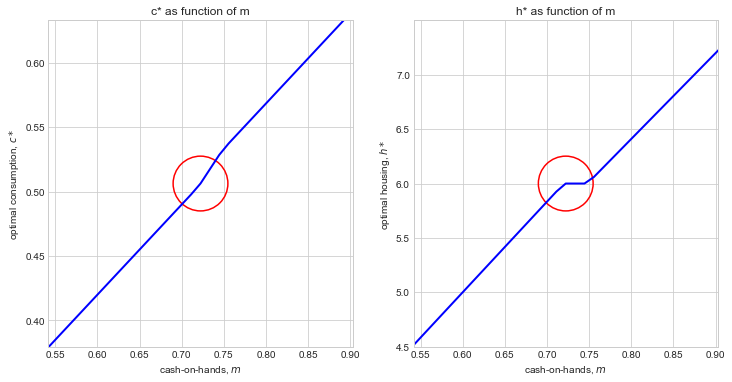

In [5]:
# a. find the index of the value closest to pc/eps=6 in h_vals
approx_index = (np.abs(h_vals-(pc/eps))).argmin()

# b. housing, consumption and budget at the breaking point
h_break = h_vals[approx_index]
c_break = c_vals[approx_index]
m_break = m_vals[approx_index]

# c. pairing the coordinates in tupples
c_mark = (m_break,c_break)
h_mark = (m_break,h_break)

# d. defining range for 'zooming' in the figures. 25% on each side of breaking point.
m_range = (m_break*0.75,m_break*1.25)
c_range = (c_break*0.75,c_break*1.25)
h_range = (h_break*0.75,h_break*1.25)

# e. draw the figures again with a closer look at the breaking point
fig2 = ip.ch_figures(c_vals,h_vals,m_vals,m_range,c_range,h_range,c_mark,h_mark)
fig2.savefig('q2_plot2.pdf')

There is indeed a disruption in both graphs. It is evident that when housing is taxed harder, the agent is will spend a larger portion of its budget on consumption and a smaller portion on housing.

# Question 3

Set seed to $1$ and $N$ to $10000$ households. Create an array of the budgets given by the distribution:
$$
\begin{aligned}
m_{i} & = \texttt{Lognormal}(-0.4,0.35)\\
\end{aligned}
$$
A function $\textbf{avgtax}$ is created to calculate the average tax on a household in the given distribution.

In [6]:
# a. set seed, N and create the distribution of budgets
np.random.seed(1)
N = 10000
mi_vals = np.random.lognormal(-0.4,0.35,N)

# b. call avgtax on the distribution of budgets
avgtax = ip.avgtax(mi_vals)

print(f'The average tax burden is: {avgtax*1000000:.2f} DKK')

The average tax burden is: 36326.80 DKK


The distribution of cash-on-hand and and optimal housing are plotted for the bonus question. Short conclusion below.

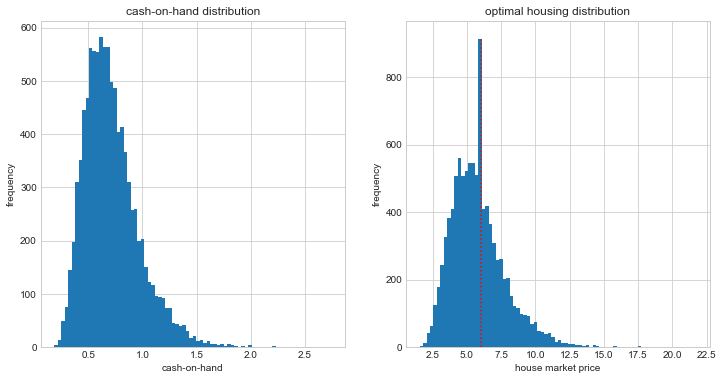

In [7]:
# a. create h* array of optimal housing
h_stars = np.empty(mi_vals.size)

for i,mi in enumerate(mi_vals):
    h_stars[i] = ip.u_max(m=mi)[1]

# b. create figure and subplots to contain histograms
histfig = plt.figure(figsize=(12,6))
h_left = histfig.add_subplot(1,2,1)
h_right = histfig.add_subplot(1,2,2)

# c. left histogram
h_left.hist(mi_vals,bins=80)
h_left.set_title('cash-on-hand distribution')
h_left.set_xlabel('cash-on-hand')
h_left.set_ylabel('frequency')

# d. right histogram
h_right.set_title('optimal housing distribution')
h_right.set_xlabel('house market price')
h_right.set_ylabel('frequency')
h_right.hist(h_stars,bins=80)
h_right.vlines(6,0,920,'red','dotted')

# e. save the figure
histfig.savefig('q3_plot1.pdf')

The cash-on-hand distribution seems to follow the desired lognormal distribution, but on the distribution chart for optimal housing there is an abnormality at $6$ M DKK. This is due to the high rate taxation cutoff, which comes in effect above $6$ M DKK making housing more expensive above this price. This means that some agents who would have otherwise chosen to buy a house at for instance $6.1$ M DKK are instead inclined to spend a larger portion of their budget on consumption.

# Question 4

$\textbf{avgtax}$ is called with the new parameters.

In [8]:
avgtax2 = ip.avgtax(mi_vals,eps=0.8,tg=0.01,tp=0.009,pc=8)

print(f'The average tax burden is: {avgtax2*1000000:.2f} DKK')

The average tax burden is: 45036.29 DKK


# Question 5

A new function `tg_finder` is defined in $\texttt{inarguralproject.py}$. Based on the household preferences this functions returns the general tax rate ($\tau^g$) needed to reach a target average tax expenditure, with the new values for the parameters $\varepsilon$, $\tau^p$ and $\overline{p}$ set as default (although other parameters can be passed to the function).
The calculation in the `tg_finder` function can take a long time for 10000 households. If it is too slow go back to Q3 and set a lower N.

Note: When finding the new general tax rate we use the optimize.minimize_scalar function with bounds=[0,1]. While $\tau^g$ can theoritically be above 1, it is not the case here, since we find a tg_new value, that results in the desired tax burden.

In [14]:
# a. calculate the general taxrate and the corresponding avgtax
tg_new = ip.tg_finder(mi_vals,target=avgtax) # target is the original average tax from question 3
avgtax_new = ip.avgtax(mi_vals,eps=0.8,tg=tg_new,tp=0.009,pc=8)

# b. print old and new tax burden for comparison
print(f'Original average tax burden: {avgtax*1000000:.2f} DKK')
print(f'New average tax burden: {avgtax_new*1000000:.2f} DKK')

# c. print the found tax rate
print(f'New general tax rate should be: {100*tg_new:.3f} %')

Original average tax burden: 36326.80 DKK
New average tax burden: 36326.80 DKK
New general tax rate should be: 0.767 %


# Conclusion

In the assignment the utility maximisation is solved for a single household in Question 1. We find that the consumer with a budget of $0.5$ M DKK should buy a house with a market value of rougly $4.17$ M DKK.

When plotting the optimal consumption and housing in Question 2, we see a breaking point in the graph at a house market value of $6$ M DKK. This makes sense since this is where the progressive tax rate kicks in, thus making housing more expensive above this market value and marginal consumption relatively cheaper.

In Question 3 and 4 we calculate the average tax burden on households, assuming their budgets are given by the distribution $\texttt{Lognormal}(-0.4,0.35)$. Looking at the graphs in Question 3, we can see that some agents are incentivised to buy houses at or below $6$ M DKK market value because of the heavier taxation above this value. 
By comparing the results from Question 3 and 4 we can also see that the new parameters where the public valuation ($\varepsilon=0.8$), progressive tax rate ($\tau^p=0.009$) and progressive taxation cutoff ($\overline{p}=8$) are higher and the general tax rate ($\tau^g=0.01$) is lower results in a net higher average tax burden.

In Question 5 we want to adjust the general tax rate ($\tau^g$) to make average tax burden the same as in Question 3. Thus we can set the average tax function equal to the old average tax and solve it for the general tax rate. We find that the general tax rate should be lowered to approx. $0.766\%$ from the previous $1\%$.